<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/notebooks/2020_0515komazawa_step_by_step_CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ステップ・バイ・ステップで画像認識の基礎

<font color="teal" size="+3"><strong>PyTorch 編</strong></font>

- Date: 2020-0320
- Author: Shin Asakawa <asakawa@ieee.org>
- Filename: 2020-0515komazawa_step-by-step-CNN-PyTorch.ipynb
<!--- note: Original がどこかにあるはずなのだが，忘れた。見つからない 2020-0513-->

In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torchvision
print(torch.__version__, torchvision.__version__)

1.4.0 0.5.0


In [3]:
#help(torchvision.models._utils)
#help(torchvision.models.alexnet)
alex = torchvision.models.alexnet(pretrained=True)

In [ ]:
import IPython.display
filename="https://miro.medium.com/max/2812/1*bD_DMBtKwveuzIkQTwjKQQ.png"
IPython.display.Image(url=filename)
# from https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96

In [ ]:
#filename="https://miro.medium.com/max/3684/1*vXBvV_Unz3JAxytc5iSeoQ.png"
#IPython.display.Image(url=filename)

In [4]:
#help(alex)
print(alex)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

- 下から上に昇って見ていくと Linear は通常の全結合数であるので in_features=4096 out_features=100 だから，4096 ニューロンを 1000 ニューロンに変換している
- その上は 4096 から 4096 に変換
- 次の (avgpool) のところで出力サイズが (6,6) になっているので penultimate 層では x=6, y=6, チャンネル数（特徴数）= 256 である。
したがって $256\times 6 \times 6 = 9126$ となる。ただし原著論文では平均プーリングではなく最大値プーリングである。

np.sqrt(9216 / 256)

In [5]:
import torchsummary

In [6]:
torchsummary.summary(alex,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
!pip install torchviz

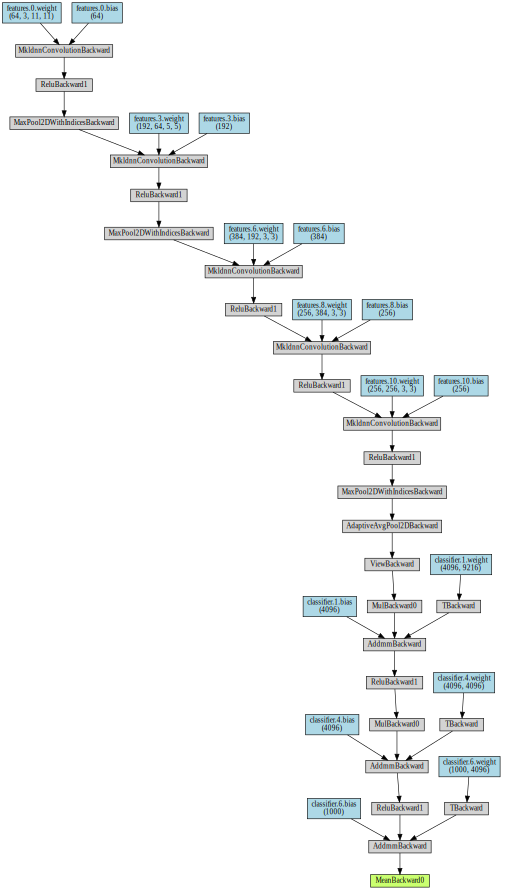

In [7]:
import torchviz

#help(torchviz.make_dot)
x = torch.rand([1,3,255,255])
y = alex.forward(x)
torchviz.make_dot(y.mean(), params=dict(alex.named_parameters()))

In [ ]:
import random
import torch.nn as nn

In [ ]:
random.seed(1)
torch.manual_seed(1)
gpu = False
alex.cpu()
torch.no_grad()
alex.eval()

In [ ]:
#help(torch.rand)
#help(torch.random)
#alex.eval()
#alex.parameters
#alex.modules
#print(dir(alex))
#help(alex.eval())  # alex.eval() でモードをセットする
#help(alex.forward(torch.rand([1,3,255,255])))
out = alex.forward(torch.rand([1,3,255,255]))  
# ということなので，[チャンネル数，x, y] という tensor を nn.Module.forward() の引数として渡せば良い
print(type(out), out.size())
print(np.argmax(out.detach().numpy()))
#torch.rand([1,3,255,255])

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
#!ls *.jpg *.png
from PIL import Image
img = Image.open('cat.jpg')
print(img)
np.asarray(img).shape  # (534,600,3) のように，(y, x, チャンネル) となっている。
print(torch.from_numpy(np.asarray(img)).size())
torch.from_numpy(np.asarray(img)).view(-1,862,1298,3).transpose(1,3).size()
# troch.view() や np.reshape() では転置できないのかしら？という疑問が湧く
# 答え：torch.view() は見かけだけを変更するので不可。

In [ ]:
# Pytorch の tensor における view と size の使い方
#a = torch.range(1, 16)
a = torch.arange(1,17)
print(a)
print(a.view(-1,4,4))

In [ ]:
# すなわち PyTorch の tensor における view は numpy における reshape と同等
np.random.rand(16).reshape(-1,4,4)

In [ ]:
#help(a.view)
x = torch.randn(4, 4)  # 乱数行列の生成
x.size() # torch.Size([4, 4])  size() 関数は行列の次数を返す関数
y = x.view(16)  # view() 関数は numpy.reshape() 関数と同等
y
y.size()  # torch.Size([16])
z = x.view(-1, 8)  # -1 は与えられたデータから類推せよという意味
z
z.size()  # torch.Size([2,8])  

a = torch.randn(1,2,3,4)  # 1 行，2 列, 3 カラム, 4 カラム＋1次 の乱数で初期化された tensor 
#a
a.size()  # torch.Size([1,2,3,4])
b = a.transpose(1,2)  # 2 番目と 3 番目を転置 transpose
#b
b.size()  # torch.Size([1,3,2,4])
c = a.view(1,3,2,4)  # c は見え方を変えるだけで内部は変化しない
print(b); print(c)
torch.equal(b,c)

In [ ]:
!ls *.jpg

In [ ]:
jpg_file = 'cat.jpg'
#IPython.display.Image(jpg_file)
plt.figure(figsize=(10,8))
plt.axis(False)
plt.imshow(plt.imread(jpg_file))

In [ ]:
img = Image.open(jpg_file)

In [ ]:
from torchvision import transforms

In [ ]:
class BaseTransform():
    """
    画像のサイズをリサイズし、色を標準化する。

    Attributes
    ----------
    sizes : int
        リサイズ先の画像の大きさ。
    mean : (R, G, B)
        各色チャネルの平均値。
    std : (R, G, B)
        各色チャネルの標準偏差。
    """

    def __init__(self, sizes, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(sizes),  # 短い辺の長さがresizeの大きさになる
            transforms.CenterCrop(sizes),  # 画像中央をresize × resizeで切り取り
            transforms.ToTensor(),  # Torchテンソルに変換
            transforms.Normalize(mean, std)  # 色情報の標準化
        ])

    def __call__(self, img):
        return self.base_transform(img)

In [ ]:
# 3. 画像の前処理と処理済み画像の表示
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)  # torch.Size([3, 224, 224])


In [ ]:
#IPython.display.Image(img_transformed.numpy())
type(img_transformed)
img_transformed.size()

In [ ]:
a = img_transformed.numpy().transpose((1,2,0))
a = np.clip(a, 0, 1)
plt.axis(False)
plt.imshow(a)

In [ ]:
#IPython.display.display(PIL.Image.fromarray(a.transpose(2,0,1)))
#IPython.display.display(a.transpose((2,0,1)))
#from ipython_display import imshow
#imshow(a)
#a.transpose((2,0,1)).shape
#a.shape
#IPython.display.display(IPython.display.Image(data=a))  # ValueError: ndarray is not C-contiguous
#IPython.display.display(a)  # nG
#IPython.display.display(PIL.Image.fromarray(a))

In [ ]:
plt.axis(False)
plt.imshow(img)

In [ ]:
# 前処理の後、バッチサイズの次元を追加する
transform = BaseTransform(resize, mean, std)  # 前処理クラス作成
img_transformed = transform(img)  # torch.Size([3, 224, 224])
inputs = img_transformed.unsqueeze_(0)  # torch.Size([1, 3, 224, 224])

In [ ]:
# モデルに入力し、モデル出力をラベルに変換する
out = alex(inputs)  # torch.Size([1, 1000])

In [ ]:
out.detach().numpy().argmax()

In [ ]:
import json
!wget https://gist.githubusercontent.com/PonDad/4dcb4b242b9358e524b4ddecbee385e9/raw/dda9454f74aa4fafee991ca8b848c9ab6ae0e732/imagenet_class_index.json

# ImageNet のラベル一覧の読み込み
with open('imagenet_class_index.json') as f:
    data = json.load(f)
    class_names = np.array([row['ja'] for row in data])

In [36]:
# ILSVRCのラベル情報をロードし辞意書型変数を生成します
import json
ILSVRC_class_index = json.load(open('imagenet_class_index.json', 'r'))
#print(ILSVRC_class_index)
len(ILSVRC_class_index)
ILSVRC_class_index[285]

{'en': 'Egyptian_cat', 'ja': 'エジプトの猫', 'num': 'n02124075'}

In [ ]:
test_img = np.random.random((224,224,3))
#test_img = PIL.Image.fromarray(test_img)
#plt.imshow(test_img)
#img_transformed2 = transform(test_img)
#inputs = img_transformed.unsqueeze_(0)
inputs = torch.from_numpy(test_img).unsqueeze_(0)

In [ ]:
#inputs.size()
#out = alex.forward(inputs)
a = torch.rand([1,3,224,224])
out = alex.forward(a)
#alex.forward(torch.from_numpy(np.random.random((1,224,224,3))))

In [ ]:
ILSVRC_class_index[out.detach().numpy().argmax()]

In [ ]:
!wget https://blog.counselor.or.jp/wp-content/uploads/2019/06/image001-20.jpg
!mv image001-20.jpg cat.jpg


In [ ]:
jpg_file = 'cat.jpg'
#IPython.display.Image(jpg_file)
img = Image.open(jpg_file)
img_transformed = transform(img)  # torch.Size([3, 224, 224])
inputs = img_transformed.unsqueeze_(0)  # torch.Size([1, 3, 224, 224])
out = alex(inputs)  # torch.Size([1, 1000])

In [ ]:
ILSVRC_class_index[out.detach().numpy().argmax()]